In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

C:\Users\Mohammad Badzohreh\AppData\Local\Temp\ipykernel_12460\3131379928.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Read Image

In [ ]:
image = cv2.imread("image/pexels-arian-malek-khosravi-3972462.jpg")
plt.axis("off")
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

Rgb histogram

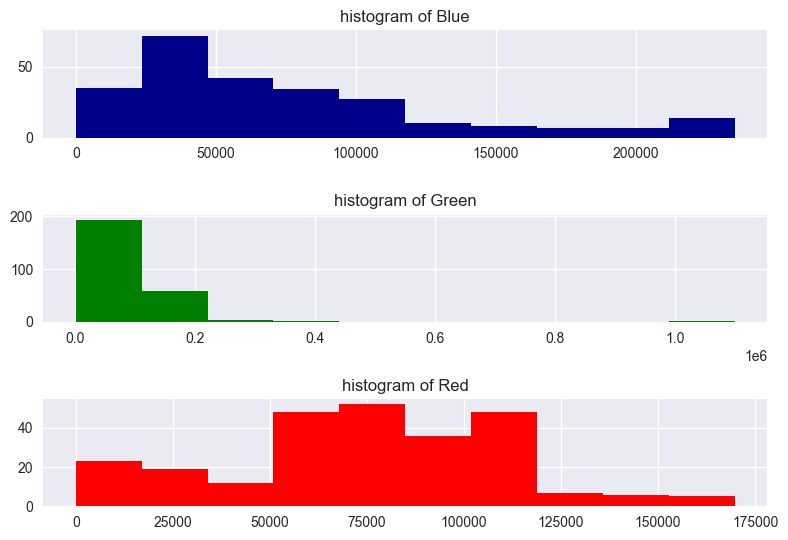

In [4]:
blue_histogram = cv2.calcHist([image], [0], None, [256], [0, 256])
red_histogram = cv2.calcHist([image], [1], None, [256], [0, 256])
green_histogram = cv2.calcHist([image], [2], None, [256], [0, 256])

plt.subplot(3,1,1)
plt.title("histogram of Blue")
plt.hist(blue_histogram,color="darkblue")

plt.subplot(3,1,2)
plt.title("histogram of Green")
plt.hist(green_histogram,color="green")

plt.subplot(3,1,3)
plt.title("histogram of Red")
plt.hist(red_histogram,color="red")

plt.tight_layout()
plt.show()

Rgb histogram

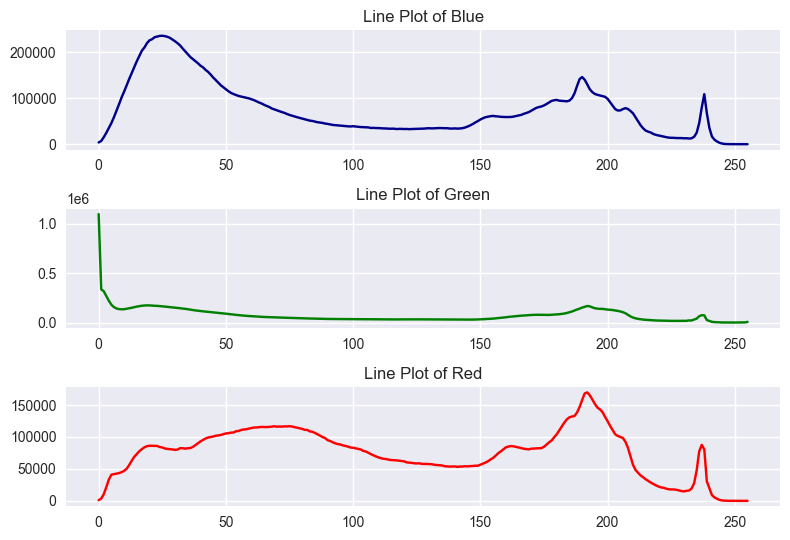

In [5]:
blue_histogram = cv2.calcHist([image], [0], None, [256], [0, 256])
red_histogram = cv2.calcHist([image], [1], None, [256], [0, 256])
green_histogram = cv2.calcHist([image], [2], None, [256], [0, 256])

plt.subplot(3,1,1)
plt.title("Line Plot of Blue")
plt.plot(blue_histogram,color="darkblue")

plt.subplot(3,1,2)
plt.title("Line Plot of Green")
plt.plot(green_histogram,color="green")

plt.subplot(3,1,3)
plt.title("Line Plot of Red")
plt.plot(red_histogram,color="red")

plt.tight_layout()
plt.show()

Visualizing the Final Results All together!


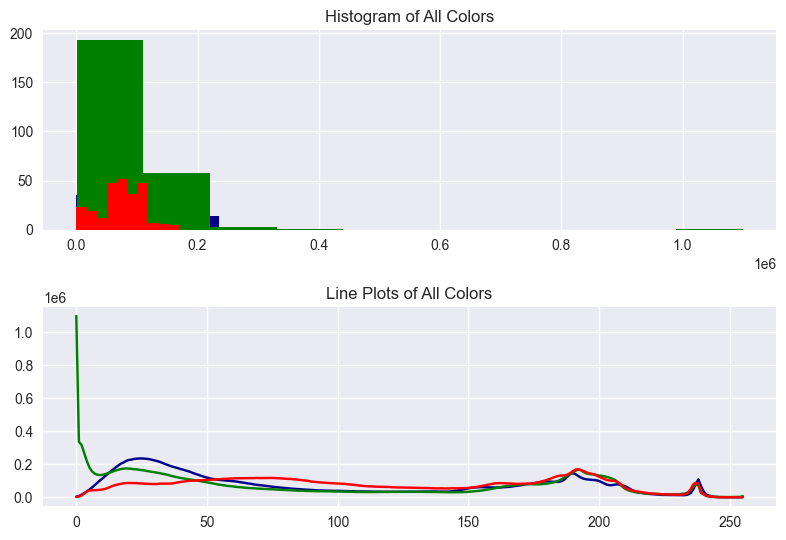

In [6]:
blue_histogram = cv2.calcHist([image], [0], None, [256], [0, 256])
red_histogram = cv2.calcHist([image], [1], None, [256], [0, 256])
green_histogram = cv2.calcHist([image], [2], None, [256], [0, 256])

plt.subplot(2,1,1)
plt.title("Histogram of All Colors")
plt.hist(blue_histogram,color="darkblue")
plt.hist(green_histogram,color="green")
plt.hist(red_histogram,color="red")

plt.subplot(2,1,2)
plt.title("Line Plots of All Colors")
plt.plot(blue_histogram,color="darkblue")
plt.plot(green_histogram,color="green")
plt.plot(red_histogram,color="red")

plt.tight_layout()
plt.show()

Color Name histogram